In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

After    0 steps, loss is 15.064423
After  200 steps, loss is 1.984581
After  400 steps, loss is 1.504532
After  600 steps, loss is 1.333140
After  800 steps, loss is 1.250958
After 1000 steps, loss is 1.199430
After 1200 steps, loss is 1.165712
After 1400 steps, loss is 1.150739
After 1600 steps, loss is 1.129096
After 1800 steps, loss is 1.109001


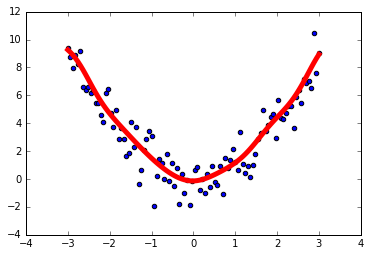

In [2]:
x_data = np.linspace(-3, 3, 100)[:,np.newaxis]
y_noise = np.random.normal(0, 1, x_data.shape)
y_data = x_data ** 2 + y_noise

def forward(x):
    w1 = tf.Variable(tf.random_normal(shape=[1, 10], stddev=0.1))
    b1 = tf.Variable(tf.zeros([10]))
    a1 = tf.nn.tanh(tf.matmul(x, w1) + b1)
    w2 = tf.Variable(tf.random_normal(shape=[10, 1], stddev=0.1))
    b2 = tf.Variable(tf.zeros([1]))
    y = tf.matmul(a1, w2) + b2
    return y

x = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.placeholder(tf.float32, shape=[None, 1])

y_hat = forward(x)

loss = tf.reduce_mean(tf.square(y - y_hat))
train = tf.train.GradientDescentOptimizer(.1).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(2000):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        if i % 200 == 0:
            loss_value = sess.run(loss, feed_dict={x: x_data, y:y_data})
            print("After %4d steps, loss is %.6f" % (i, loss_value))
    
    plt.scatter(x_data, y_data, s=20)
    pre = sess.run(y_hat, feed_dict={x: x_data})
    plt.plot(x_data, pre, "r-", lw=5)
    plt.show()